In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [6]:
tcars=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/toyota%20corolla%202.csv",encoding="Latin1")
tcars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [7]:
tcars.shape

(1436, 38)

In [8]:
tcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [12]:
tcar=pd.concat([tcars.iloc[:,2:4],tcars.iloc[:,6:7],tcars.iloc[:,8:9],tcars.iloc[:,12:14],tcars.iloc[:,15:18]],axis=1)
tcar.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [14]:
tcar=tcar.rename({"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"},axis=1)
tcar.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [15]:
tcar[tcar.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
tcar1=tcar.drop_duplicates().reset_index(drop=True)
tcar1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [18]:
tcar1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


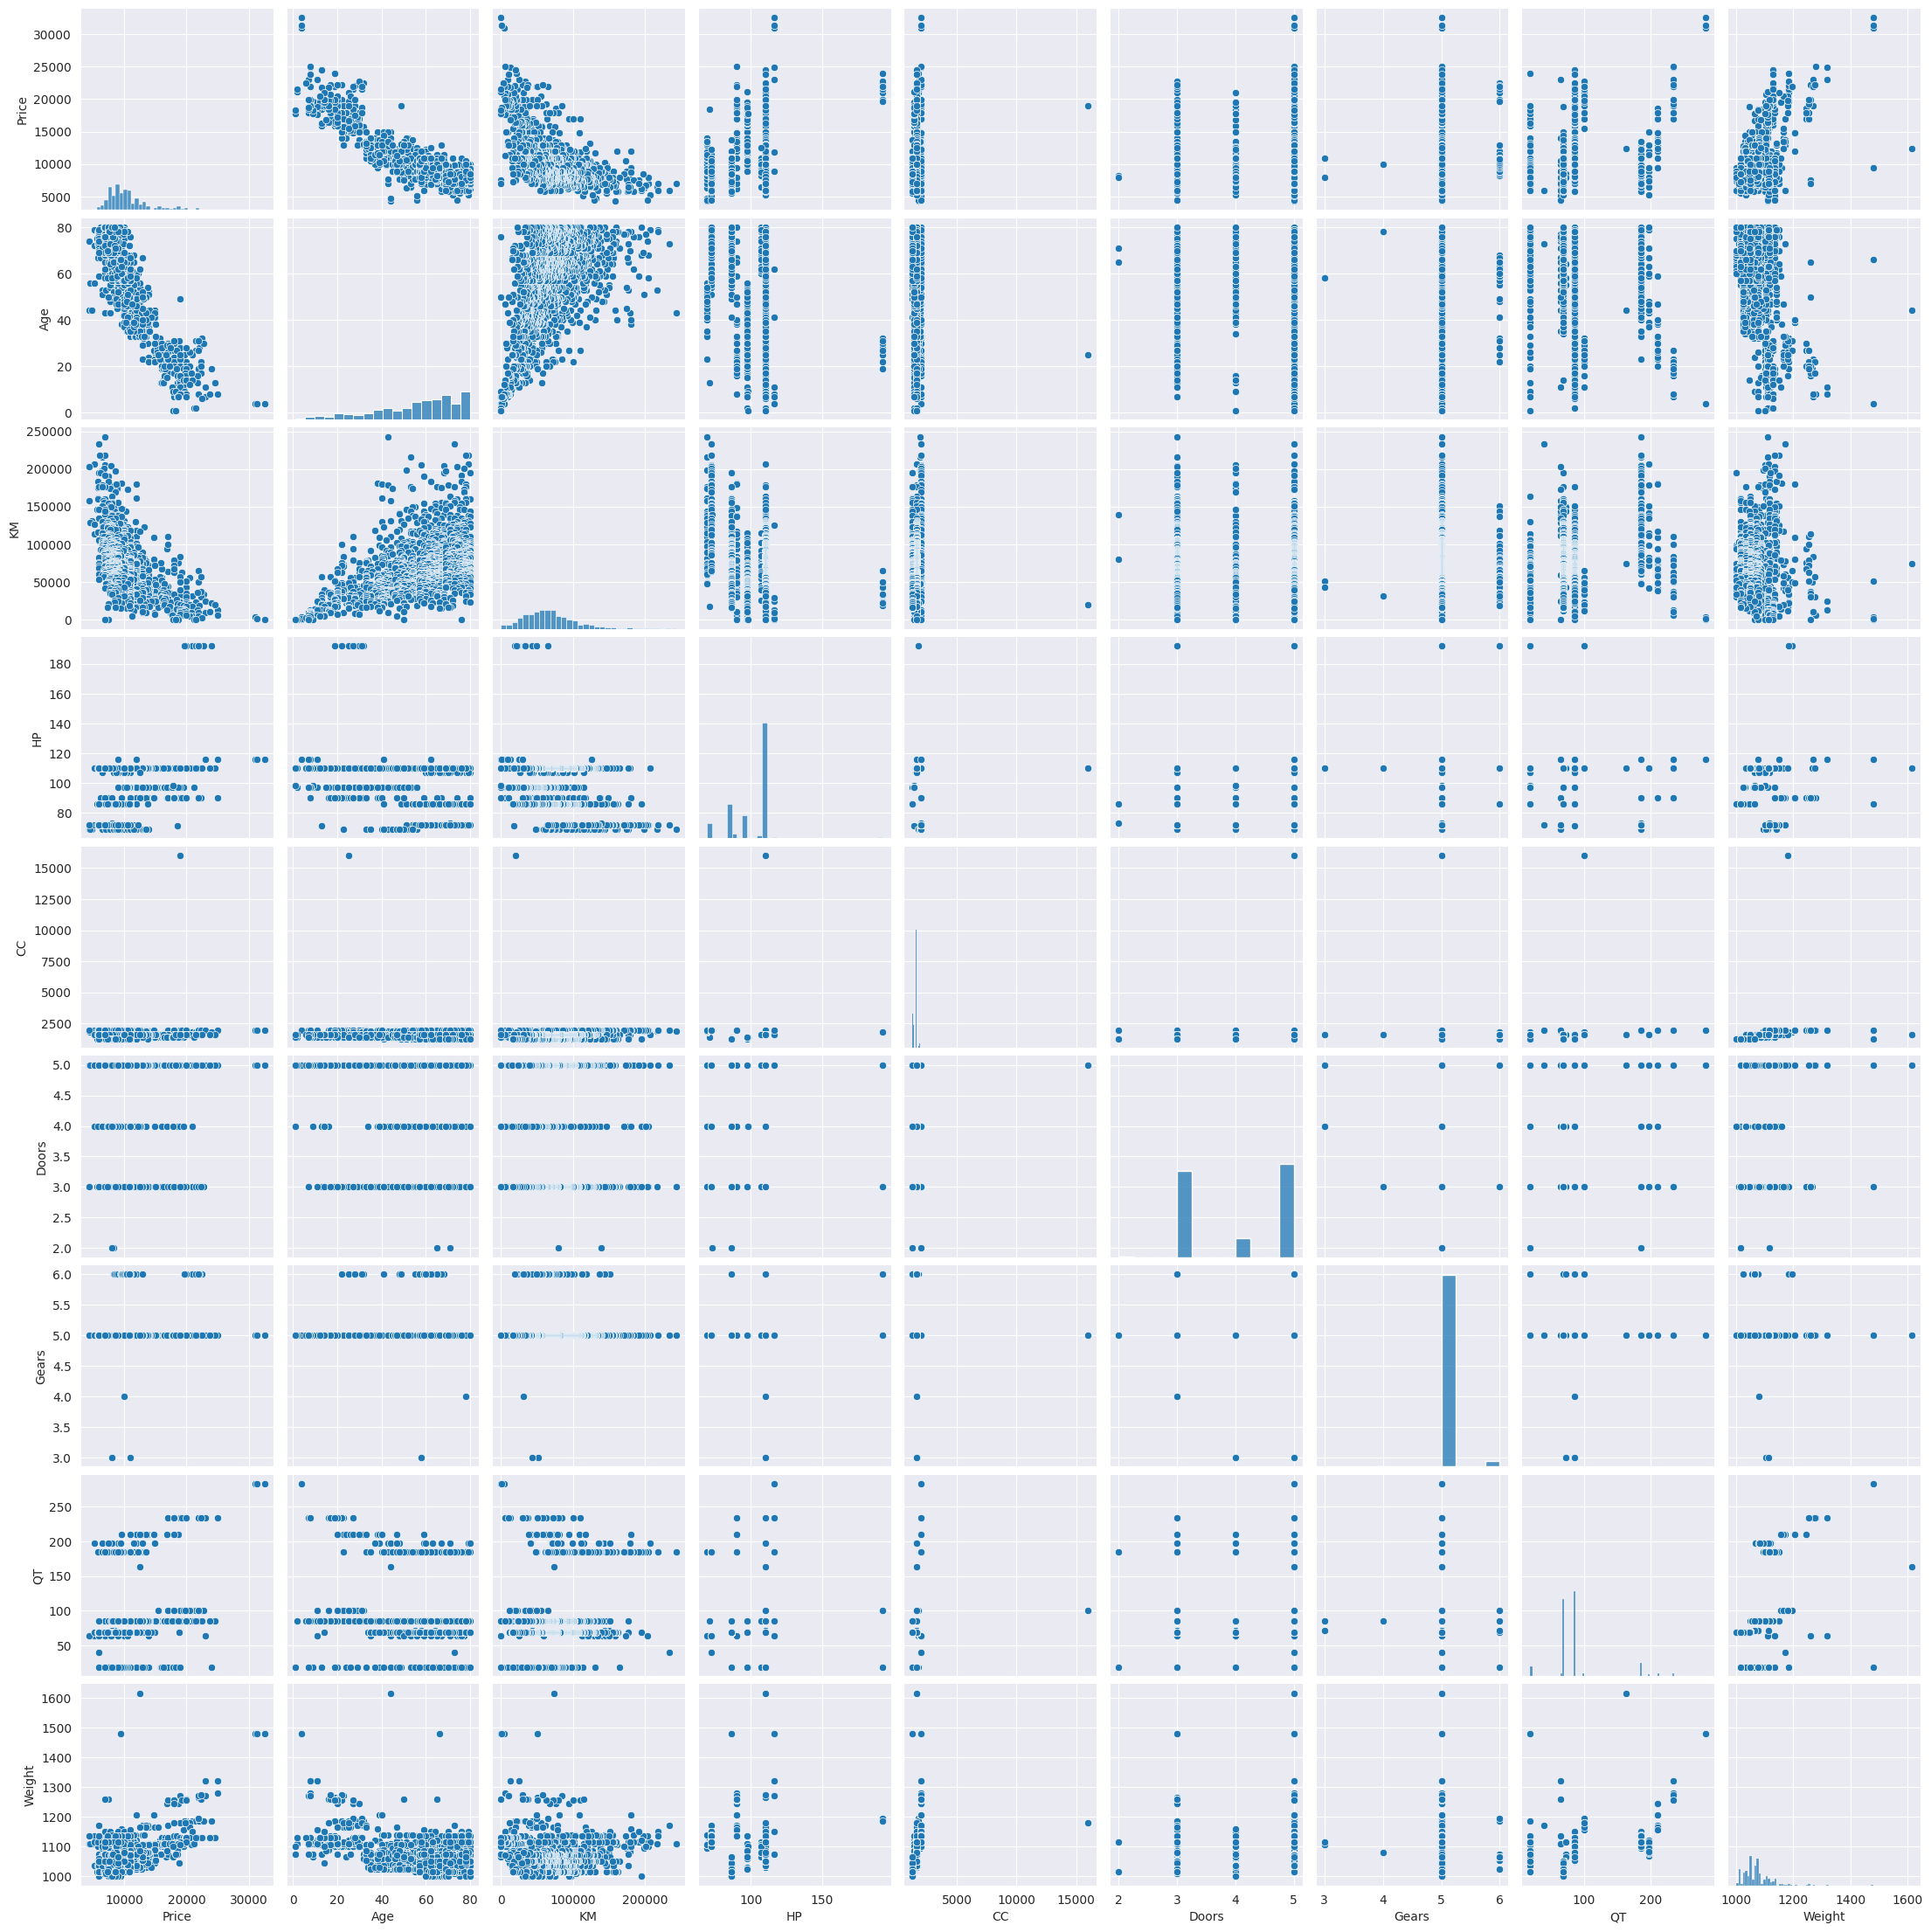

In [20]:
sns.set_style(style="darkgrid")
sns.pairplot(tcar1)

In [21]:
#Building Model
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=tcar1).fit()

In [22]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [81]:
model.tvalues,model.pvalues

(Intercept   -10.222025
 Age         -45.176330
 KM          -14.134778
 HP           13.308350
 CC          -12.507786
 Doors        -3.252958
 Gears         2.577464
 QT            3.769637
 Weight       23.594969
 dtype: float64,
 Intercept     1.019465e-23
 Age          3.502630e-277
 KM            1.517857e-42
 HP            3.573157e-38
 CC            3.926374e-34
 Doors         1.168890e-03
 Gears         1.005269e-02
 QT            1.701742e-04
 Weight       3.726261e-104
 dtype: float64)

In [78]:
model.rsquared*100,model.rsquared_adj*100

(88.39684606741538, 88.33161400033129)

In [27]:
#Building SLR and MLR models for insignificant values - CC and Doors
slr_c=smf.ols("Price~CC",data=tcar1).fit()
slr_c.tvalues,slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [28]:
slr_d=smf.ols("Price~Doors",data=tcar1).fit()
slr_d.tvalues,slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [30]:
mlr_dc=smf.ols("Price~CC+Doors",data=tcar1).fit()
mlr_dc.tvalues,mlr_dc.pvalues #CC and Doors has significant value.

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [32]:
rsq_a=smf.ols("Age~KM+HP+CC+Doors+Gears+QT+Weight",data=tcar1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_km=smf.ols("KM~Age+HP+CC+Doors+Gears+QT+Weight",data=tcar1).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols("HP~Age+KM+CC+Doors+Gears+QT+Weight",data=tcar1).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols("CC~Age+KM+HP+Doors+Gears+QT+Weight",data=tcar1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_d=smf.ols("Doors~Age+KM+HP+CC+Gears+QT+Weight",data=tcar1).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_g=smf.ols("Gears~Age+KM+HP+CC+Doors+QT+Weight",data=tcar1).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_qt=smf.ols("QT~Age+KM+HP+CC+Doors+Gears+Weight",data=tcar1).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_w=smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+QT",data=tcar1).fit().rsquared
vif_w=1/(1-rsq_w)

d1=pd.DataFrame({"Variables":["Age","KM","HP","CC","Doors","Gears","QT","Weight"],
                 "VIF":[vif_a,vif_km,vif_hp,vif_cc,vif_d,vif_g,vif_qt,vif_w]})
d1

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


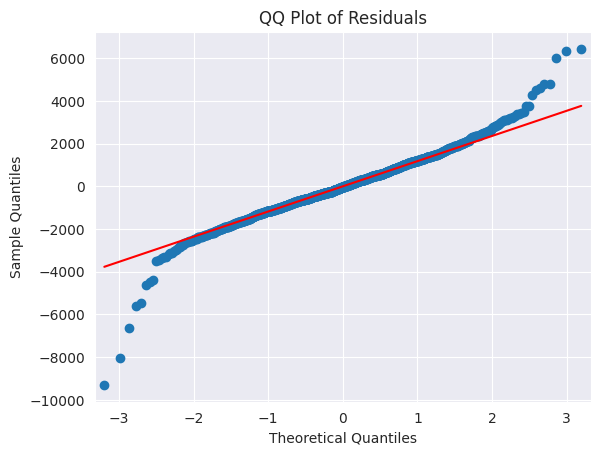

In [33]:
#Since no VIF>20, no Collinearity. Thus, below.
sm.qqplot(model.resid,line="q")
plt.title("QQ Plot of Residuals")
plt.show()

In [51]:
#Detecting outliers
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [35]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [36]:
#Homoscedascity and Heteroscedascity
def standard_values(vals):return (vals-vals.mean())/vals.std()

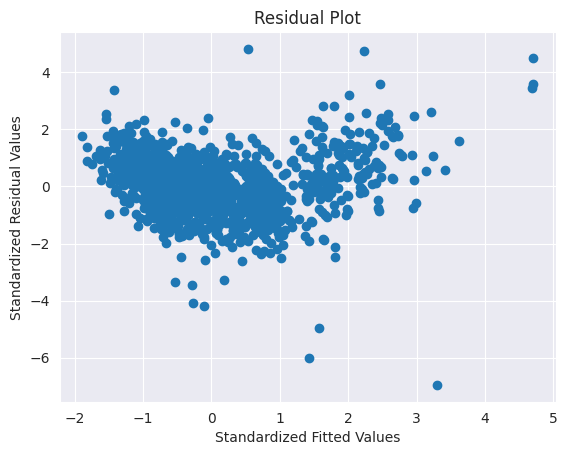

In [38]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

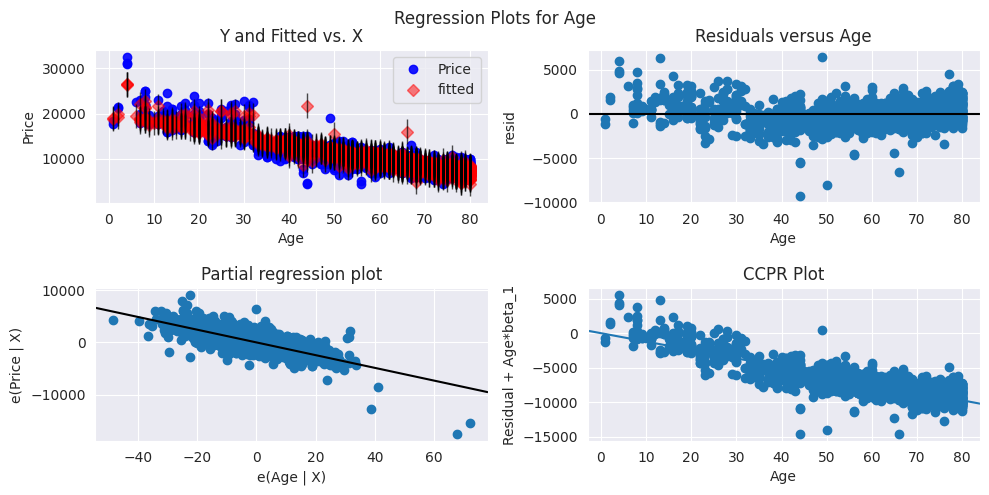

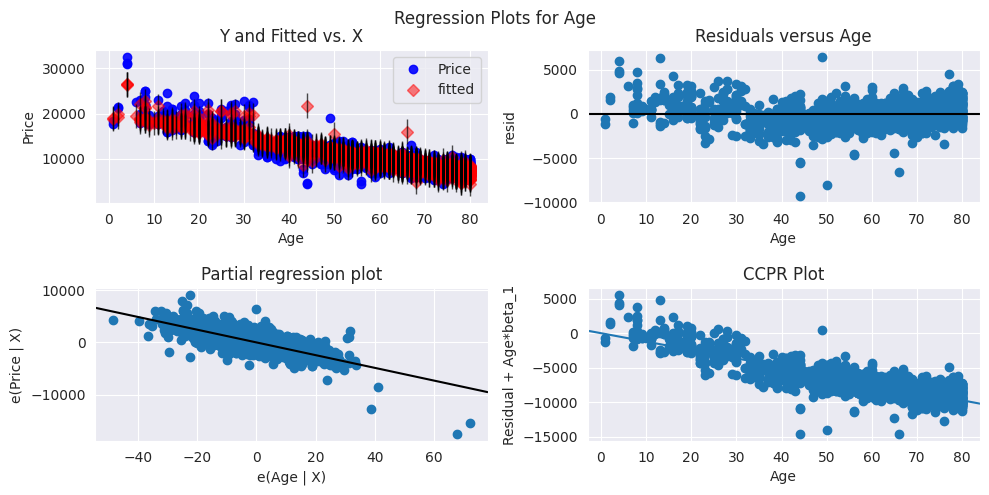

In [43]:
#Residual Regression Plots
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Age",fig=fig)

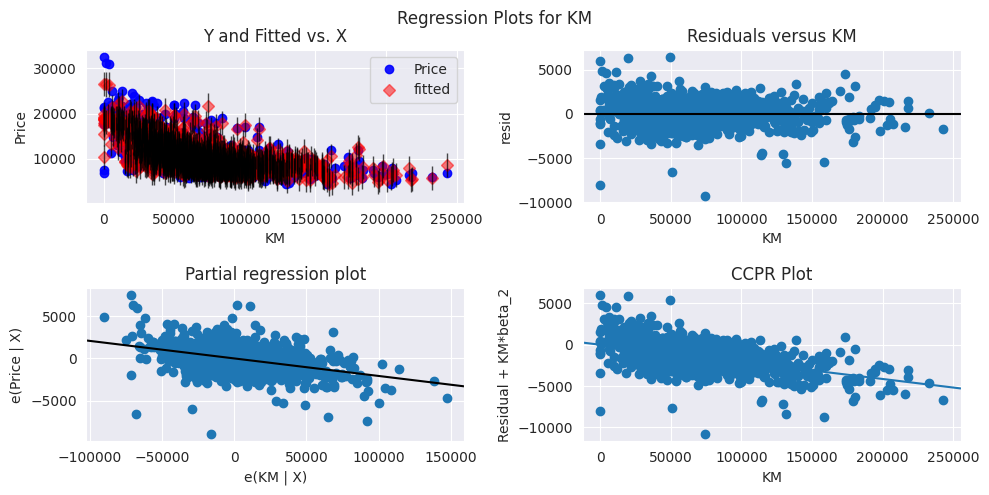

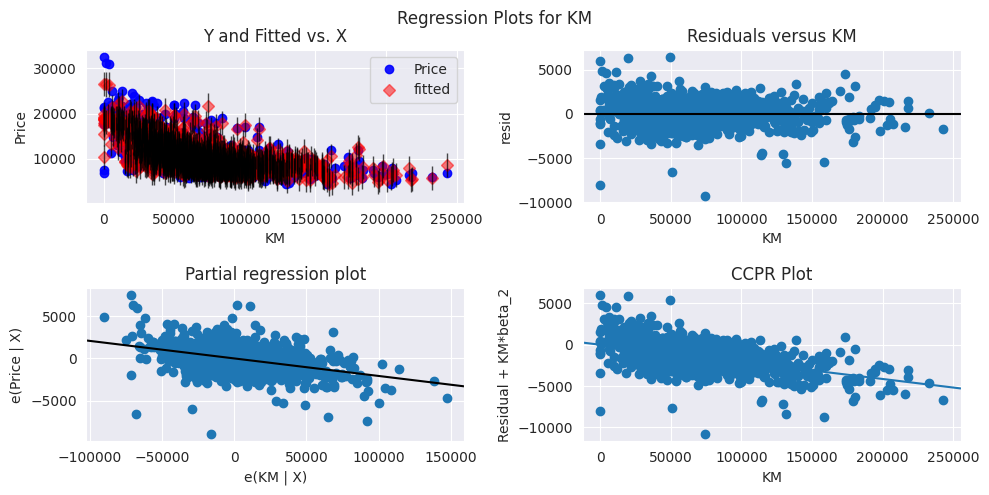

In [44]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)

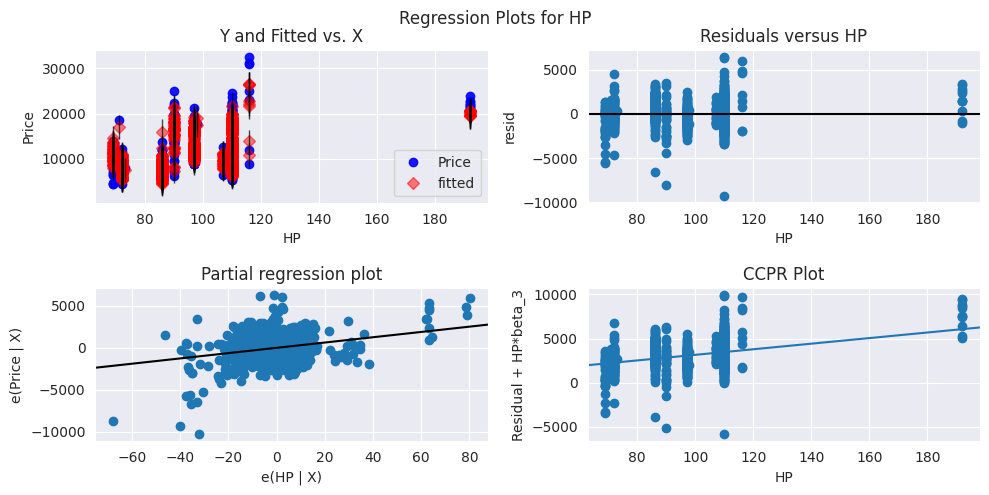

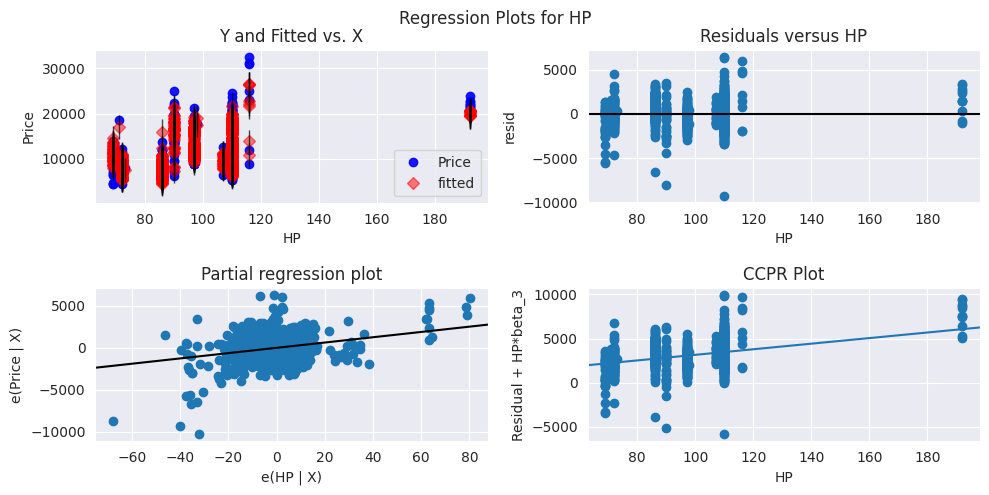

In [45]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)

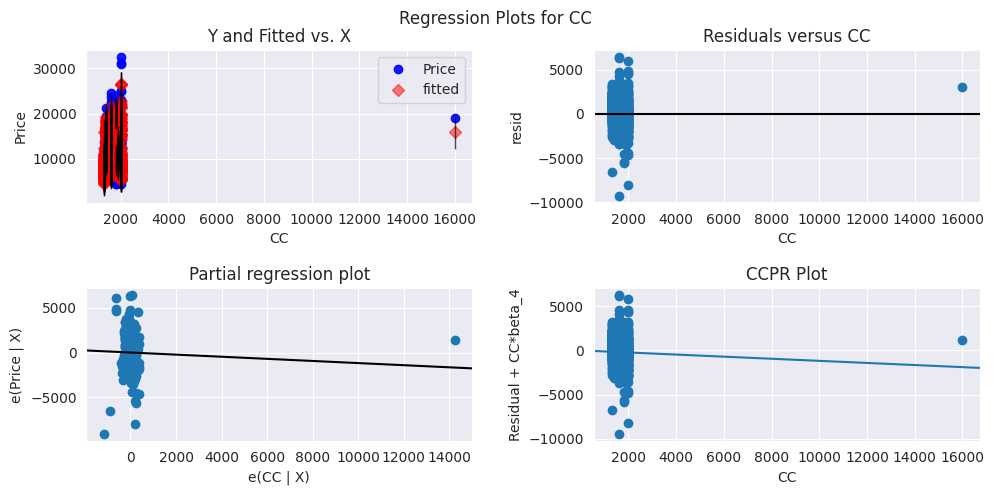

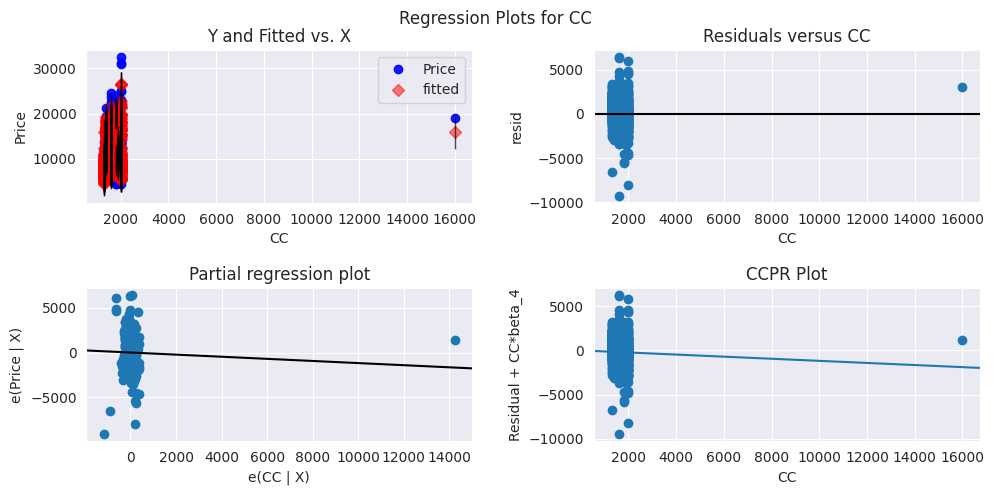

In [46]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"CC",fig=fig)

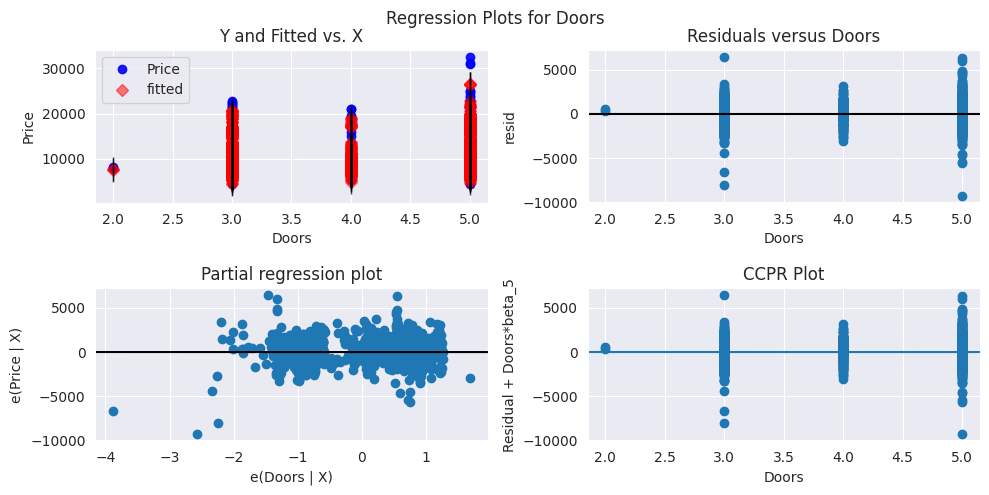

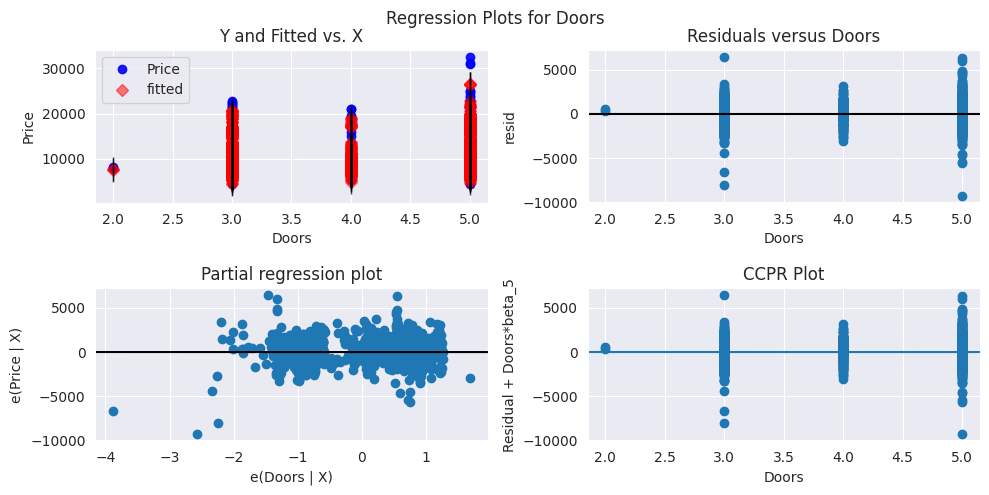

In [47]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)

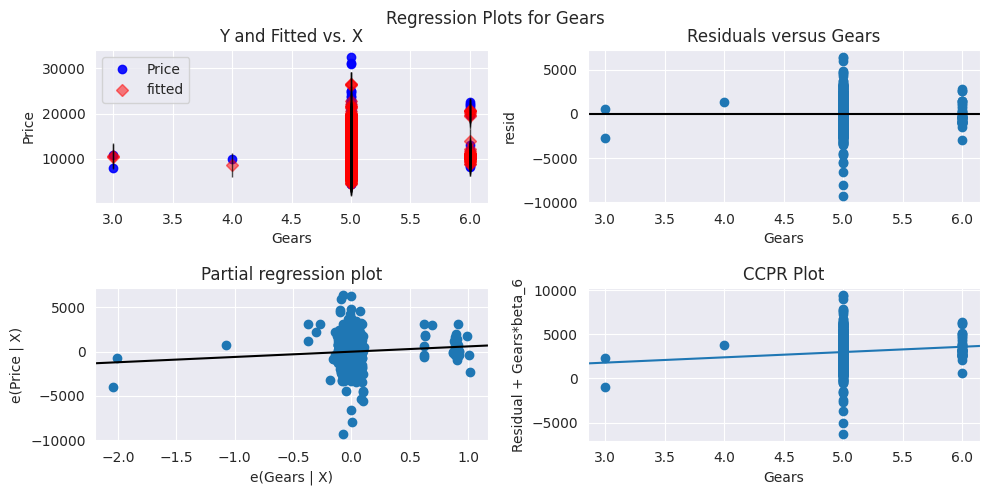

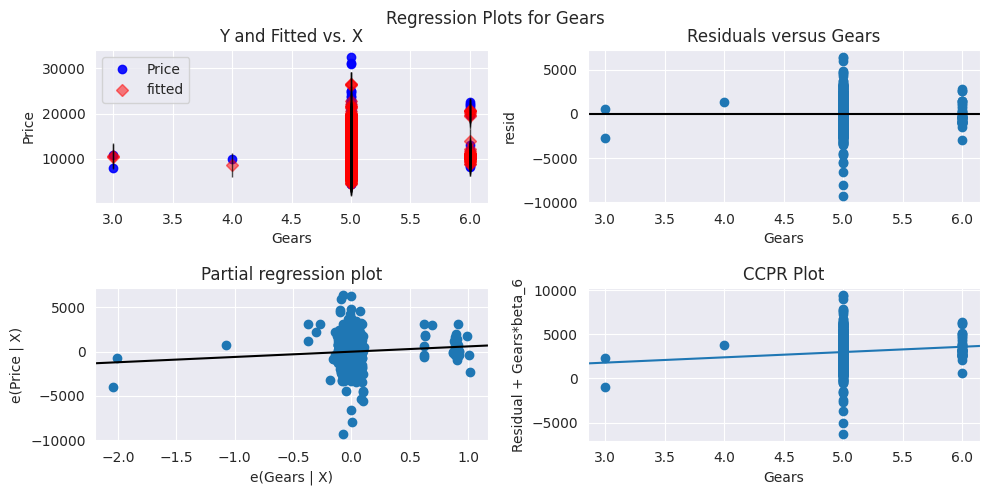

In [48]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig)

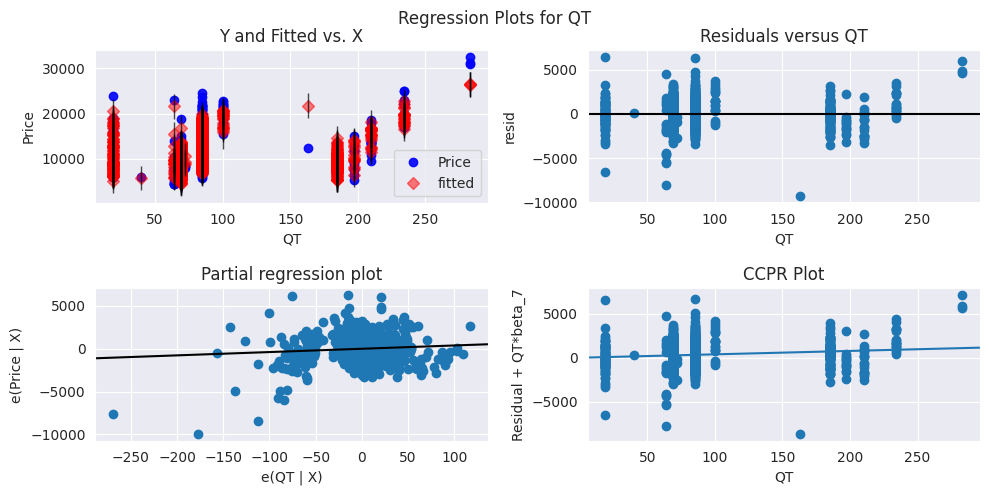

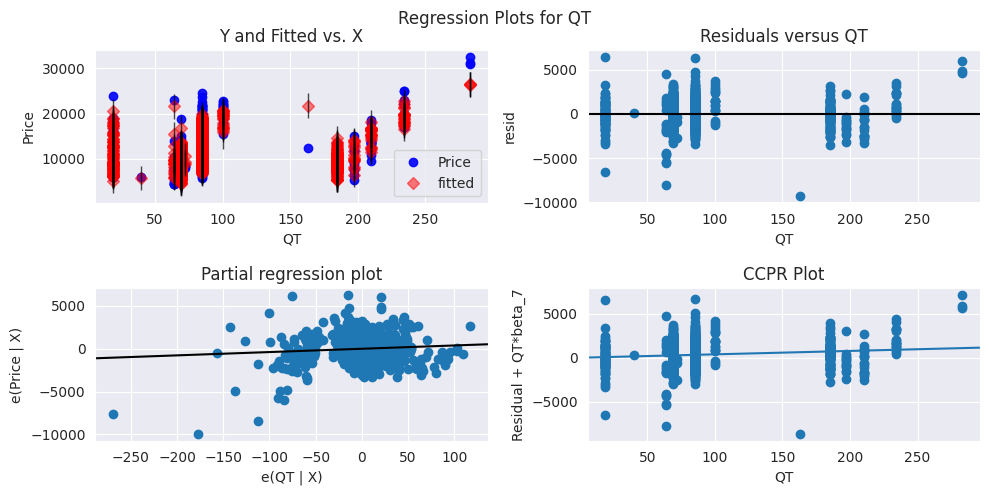

In [49]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"QT",fig=fig)

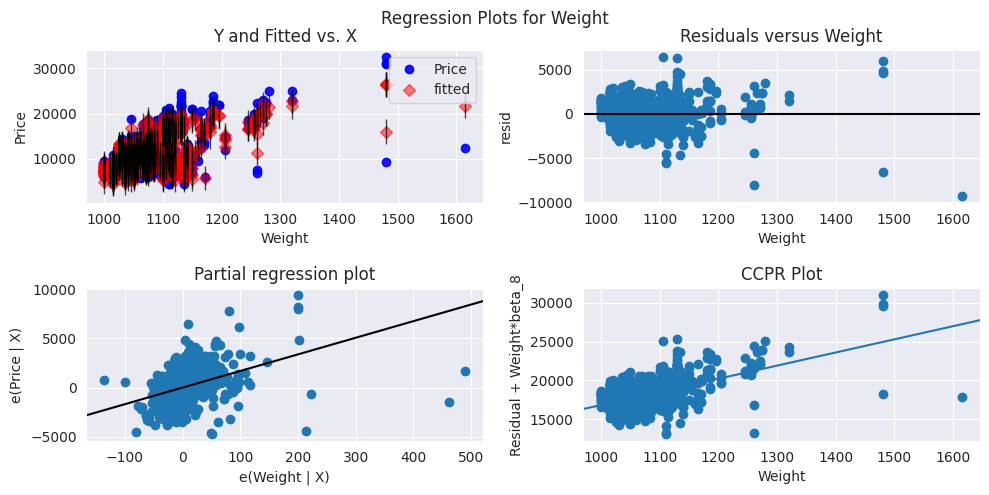

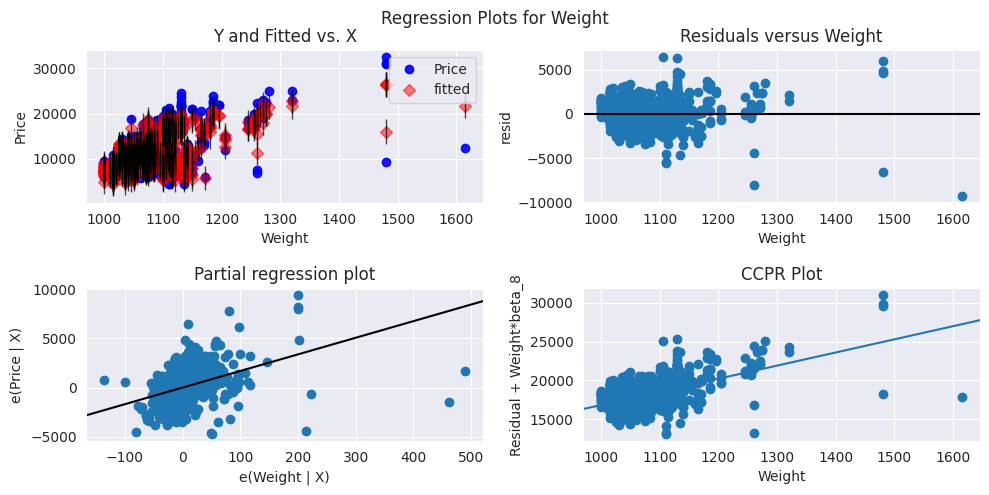

In [50]:
fig=plt.figure(figsize=(10,5))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig)

In [52]:
#Checking Outliers/Influencers
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

In [53]:
np.argmax(c),np.max(c)

(80, 78.72950582258932)

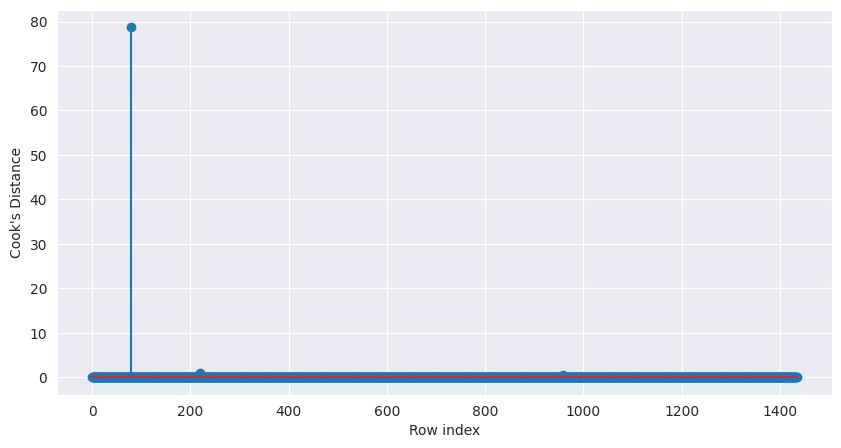

In [55]:
fig=plt.figure(figsize=(10,5))
plt.stem(np.arange(len(tcar1)),np.round(c,5))
plt.xlabel("Row index")
plt.ylabel("Cook's Distance")
plt.show()

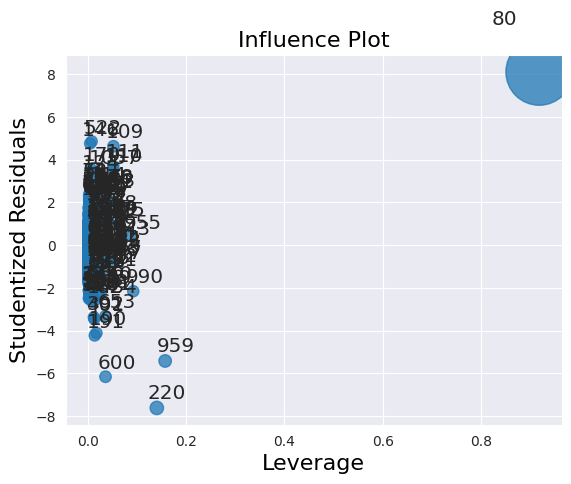

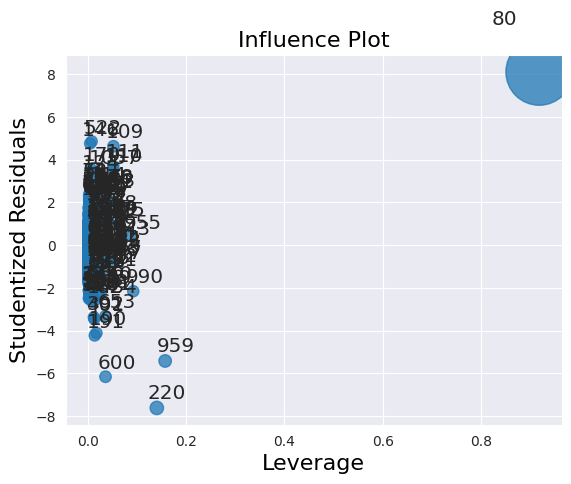

In [60]:
influence_plot(model,figsize=(20,20))

In [62]:
#Leverage Cutoff
k=tcar1.shape[1]
n=tcar1.shape[0]
lev=(3*(k+1))/n
lev*1000

20.905923344947738

In [63]:
tcar1[tcar1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [64]:
tcar2=tcar1.copy()

In [66]:
tcar3=tcar2.drop(tcar2.index[[80]],axis=0).reset_index(drop=True)
tcar3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [70]:
#Final Model
while np.max(c)>0.5:
  model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=tcar3).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  tcar3=tcar3.drop(tcar3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  tcar3
else:
  final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=tcar3).fit()
  final_model.rsquared,final_model.aic
  print("The accuracy of the model is improved to:",final_model.rsquared)

The accuracy of the model is improved to: 0.8882395145171204


In [72]:
if np.max(c)>0.5:
  model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=tcar3).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  tcar3=tcar3.drop(tcar.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  tcar3
elif np.max(c)<0.5:
  final_model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=tcar3).fit()
  final_model.rsquared, final_model.aic
  print("The model accuracy is improved to:",final_model.rsquared*100)

The model accuracy is improved to: 88.82395145171203


In [73]:
new_model=pd.DataFrame({'Age':15,"KM":60000,"HP":70,"CC":1800,"Doors":4,"Gears":5,"QT":75,"Weight":1300},index=[0])
new_model

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,15,60000,70,1800,4,5,75,1300


In [74]:
final_model.predict(new_model)

0    20750.738994
dtype: float64

In [75]:
y_pred=final_model.predict(tcar3)
y_pred

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64